# Introdução a análise de dados com Python

Fontes: 
* https://swcarpentry.github.io/python-novice-inflammation-2.7/01-numpy.html

# Conhecendo o Jupyter Notebook


Guia básico: [clique aqui](https://docs.pipz.com/central-de-ajuda/learning-center/guia-basico-de-markdown#open)

* Criar novas linhas: b ou alt + enter
* Executar uma linha: shift + enter
* Você pode mudar uma linha entre code e markdown

## 1 -  Analisando Dados de Pacientes

Estamos estudando inflamação em pacientes que receberam um novo tratamento para artrite, precisamos analisar a primeira dúzia de conjuntos de dados.
Os conjuntos de dados são armazenados em valores separados por vírgula no formato CSV:
cada linha contém informações para um único paciente,
e as colunas representam dias sucessivos.
As primeiras fileiras do nosso primeiro arquivo se parecem com isto:

    0,0,1,3,1,2,4,7,8,3,3,3,10,5,7,4,7,7,12,18,6,13,11,11,7,7,4,6,8,8,4,4,5,7,3,4,2,3,0,0
    0,1,2,1,2,1,3,2,2,6,10,11,5,9,4,4,7,16,8,6,18,4,12,5,12,7,11,5,11,3,3,5,4,4,5,5,1,1,0,1
    0,1,1,3,3,2,6,2,5,9,5,7,4,5,4,15,5,11,9,10,19,14,12,17,7,12,11,7,4,2,10,5,4,2,2,3,2,2,1,1
    0,0,2,0,4,2,2,1,6,7,10,7,9,13,8,8,15,10,10,7,17,4,4,7,6,15,6,4,9,11,3,5,6,3,3,4,2,3,2,1
    0,1,1,3,3,1,3,5,2,4,4,7,6,5,3,10,8,10,6,17,9,14,9,7,13,9,12,6,7,7,9,6,3,2,2,4,2,0,1,1

Nós queremos:

* carregar esses dados na memória,
* calcular a inflamação média por dia em todos os pacientes, e
* traçar o resultado.

In [1]:
# %whos
# help

### Carregando os Dados
Uma **biblioteca** é uma família de unidades de código (funções, classes, variáveis) que implementam um conjunto de tarefas relacionadas.

Para carregar nossos dados de inflamações,
precisamos [importar](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.html#import) uma biblioteca chamada NumPy
que sabe operar em matrizes:

In [36]:
# instalando o numpy
# pip install numpy

**Importando o numpy**

In [2]:
import numpy

Importar uma biblioteca é como tirar um equipamento de laboratório de um armário de armazenamento
e configurando-o no banco.
Uma vez que está pronto,
podemos pedir à biblioteca que leia nosso arquivo de dados para nós:

**Carregando os dados**

In [5]:
data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

Esta declaração não produz qualquer saída porque a atribuição não exibe nada.
Se quisermos verificar se nossos dados foram carregados, podemos imprimir o valor da variável:

In [8]:
print(data)

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]


### Manipulando os Dados

Agora que nossos dados estão na memória, podemos começar a fazer coisas com eles.
Primeiro,
vamos perguntar a qual [tipo](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.html#data-type) de coisa `data` se refere:

In [9]:
print (type(data))

<class 'numpy.ndarray'>


O resultado nos diz que `data` atualmente se refere a uma matriz N-dimensional criada pela biblioteca NumPy.
Podemos ver como que é  o [formato/shape](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.htm#shape) desta forma:

In [12]:
print (data.shape)

(60, 40)


Isso nos diz que `data` possui 60 linhas e 40 colunas.

Se quisermos **obter um único valor** da matriz, devemos fornecer um [índice](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.htm#index) entre colchetes, assim como fazemos em matemática:

In [52]:
data[30, 20]

13.0

Um índice como `[30, 20]` seleciona um único elemento de uma matriz,
mas também **podemos selecionar seções inteiras**.
Por exemplo,
podemos selecionar os primeiros dez dias (colunas) de valores
para as primeiras quatro (linhas) pacientes como este:

In [56]:
data[0:4, 0:10]

array([[0., 0., 1., 3., 1., 2., 4., 7., 8., 3.],
       [0., 1., 2., 1., 2., 1., 3., 2., 2., 6.],
       [0., 1., 1., 3., 3., 2., 6., 2., 5., 9.],
       [0., 0., 2., 0., 4., 2., 2., 1., 6., 7.]])

O [intervalo](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.htm#slice) `0: 4` significa:
"Comece no índice 0 e vá até, mas não incluído, o índice 4."

Não temos que começar, necessariamente, intervalos em 0:

e não precisamos acessar todos os valores do intervalo  --- se fornecemos um [passo](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.htm#stride),
Python pega os valores espaçados com o `passo` definido:

In [13]:
print (data[0:10:3, 0:10:2])

[[0. 1. 1. 4. 8.]
 [0. 2. 4. 2. 6.]
 [0. 2. 4. 2. 5.]
 [0. 1. 1. 5. 5.]]


Aqui,
nós pegamos as linhas 0, 3, 6 e 9,
e as colunas 0, 2, 4, 6 e 8.
(Novamente, sempre incluímos o limite inferior,
mas pare quando alcançamos ou cruzamos o limite superior.)

Também não precisamos incluir o limite superior e inferior do intervalo.
Se não incluímos o limite inferior, Python usa 0 por padrão;
se não incluímos o superior,
o intervalo corre até o final do eixo, e se não incluímos nenhum
(isto é, se usarmos apenas ':' por conta própria)
O intervalo inclui tudo:

In [62]:
small = data[:3, 37:]
print ('small is:')
print (small)

small is:
[[3. 0. 0.]
 [1. 0. 1.]
 [2. 1. 1.]]


Arrays também sabem como executar operações matemáticas comuns em seus valores.
Se queremos encontrar a inflamação média para todos os pacientes em todos os dias,
por exemplo, podemos pedir a matriz pelo seu **valor médio**:

In [63]:
print (data.mean())

6.14875


As matrizes numPy têm muitos métodos úteis:

In [64]:
print ('maximum inflammation:', data.max())
print ('minimum inflammation:', data.min())
print ('standard deviation:', data.std())

maximum inflammation: 20.0
minimum inflammation: 0.0
standard deviation: 4.613833197118566


Ao analisar dados,
muitas vezes queremos olhar para <b>estatísticas parciais</b>,
como o valor máximo por paciente
ou o valor médio por dia.
Uma maneira de fazer isso é selecionar os dados que queremos para criar uma nova matriz temporária, e então fazer o cálculo:

In [65]:
patient_0 = data[0, :] # 0 on the first axis, everything on the second
print ('maximum inflammation for patient 0:', patient_0.max())

maximum inflammation for patient 0: 18.0


Na verdade, não precisamos armazenar a linha em uma variável própria.
Em vez disso, podemos combinar a seleção e o método de chamada:

In [66]:
print ('maximum inflammation for patient 2:', data[2, :].max())

maximum inflammation for patient 2: 19.0


E se precisarmos da inflamação máxima para *cada* um dos pacientes ou a média de cada dia?
Como mostra o diagrama abaixo,
queremos realizar a operação em um eixo:

<!-- <img src="https://swcarpentry.github.io/python-novice-inflammation-2.7/fig/python-operations-across-axes.svg" alt="Operations Across Axes" /> -->

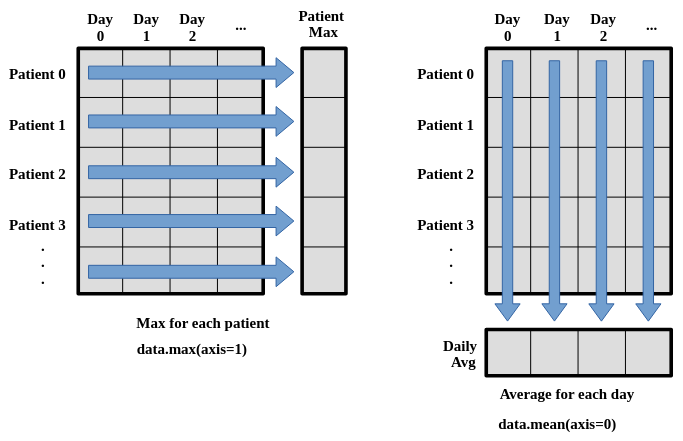

In [79]:
data.shape

(60, 40)

Para suportar isso, a maioria dos métodos de matriz nos permitem especificar o eixo em que queremos trabalhar.
Se pedimos a **média para o eixo 0**, teremos:

In [80]:
print (data.mean(axis=0))

[ 0.          0.45        1.11666667  1.75        2.43333333  3.15
  3.8         3.88333333  5.23333333  5.51666667  5.95        5.9
  8.35        7.73333333  8.36666667  9.5         9.58333333 10.63333333
 11.56666667 12.35       13.25       11.96666667 11.03333333 10.16666667
 10.          8.66666667  9.15        7.25        7.33333333  6.58333333
  6.06666667  5.95        5.11666667  3.6         3.3         3.56666667
  2.48333333  1.5         1.13333333  0.56666667]


Como uma verificação rápida, podemos perguntar a esta matriz qual é a sua forma:

In [81]:
print (data.mean(axis=0).shape)

(40,)


A expressão `(40,)` nos diz que temos um vetor N&times;1,
então esta é a **inflamação média por dia para todos os pacientes**.

Se medimos em todo o eixo 1, obtemos:

In [88]:
print (data.mean(axis=1))

[5.45  5.425 6.1   5.9   5.55  6.225 5.975 6.65  6.625 6.525 6.775 5.8
 6.225 5.75  5.225 6.3   6.55  5.7   5.85  6.55  5.775 5.825 6.175 6.1
 5.8   6.425 6.05  6.025 6.175 6.55  6.175 6.35  6.725 6.125 7.075 5.725
 5.925 6.15  6.075 5.75  5.975 5.725 6.3   5.9   6.75  5.925 7.225 6.15
 5.95  6.275 5.7   6.1   6.825 5.975 6.725 5.7   6.25  6.4   7.05  5.9  ]


In [89]:
data.mean(axis=1).shape

(60,)

que é a **inflamação média por paciente em todos os dias**.

#### Exercício

Uma subseção de uma matriz é chamada de [fatia](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.html#slice).
Podemos pegar fatias de strings de caracteres também:

In [90]:
element = 'oxygen'
print ('first three characters:', element[0:3])
print ('last three characters:', element[3:6])

first three characters: oxy
last three characters: gen


1. Qual é o valor de `element [: 4]`?
     E `element [4:]`?
     Ou `element [:]`?

1. O que é `element [-1]`?
     O que é `element [-2]`?
     Dadas essas respostas,
     explique o que `element [1: -1]` faz.

1. A expressão `element [3: 3]` produz uma [string vazia](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.html#empty-string),
     ou seja, uma string que não contém caracteres.
     Se `data` contém nossa matriz de dados de pacientes,
     O que `data [3: 3, 4: 4]` produz?
     E quanto a `data [3: 3,:]`?

### Plotando

In [111]:
# instalando o matplotlib
# pip install matplotlib

O matemático Richard Hamming já disse,
"O objetivo da computação é gerar insights, não números"
e a melhor maneira de obter estes insights é visualizandos os dados.
A visualização merece uma leitura inteira (ou curso) própria,
mas podemos explorar alguns recursos da biblioteca `matplotlib` do Python aqui.
Primeiro,
digamos ao IPython Notebook que queremos que nossos gráficos sejam exibidos inline,
em vez de em uma janela de visualização separada:

In [18]:
%matplotlib inline

O `%` no início da linha indica que este é um comando para o notebook,
em vez de uma declaração em Python.
A seguir, vamos importar o módulo `pyplot` de ` matplotlib`
e usar duas de suas funções para criar e exibir um mapa de calor de nossos dados:

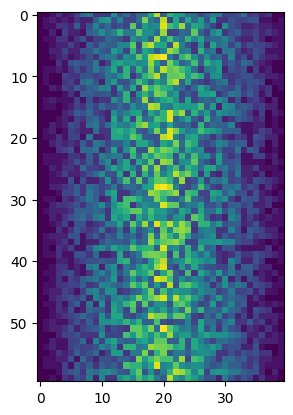

In [21]:
from matplotlib import pyplot
pyplot.imshow(data)
pyplot.show()

As regiões azuis neste mapa de calor são valores baixos, enquanto o vermelho mostra valores altos.
Como podemos ver, a inflamação aumenta e cai em um período de 40 dias.
Vamos dar uma olhada na inflamação média ao longo do tempo:

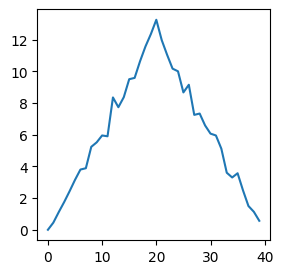

In [119]:
ave_inflammation = data.mean(axis=0)
pyplot.figure(figsize=(3, 3))
pyplot.plot(ave_inflammation)
pyplot.show()

Aqui,
colocamos a média por dia em todos os pacientes na variável `ave_inflammation`,
então pedimos o `pyplot` para criar e exibir um gráfico de linha desses valores.
O resultado é aproximadamente um aumento linear e queda,o que é suspeito:
com base em outros estudos, esperamos um aumento mais acentuado e queda mais lenta.
Vamos dar uma olhada em outras duas estatísticas:

inflamação máxima por dia


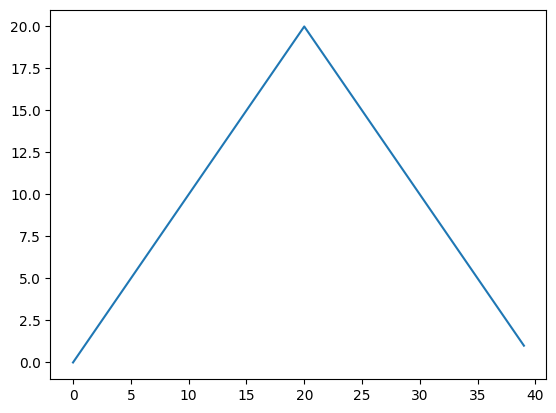

inflamação mínima por dia


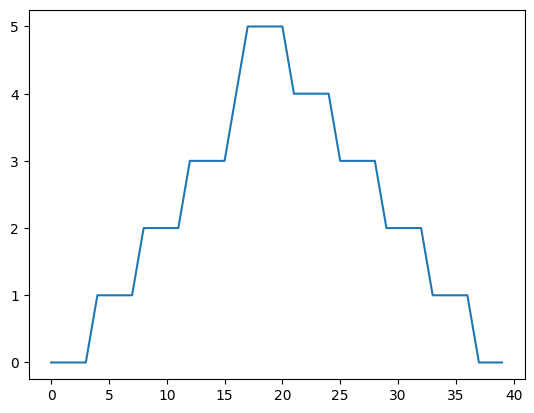

In [120]:
print ('inflamação máxima por dia')
pyplot.plot(data.max(axis=0))
pyplot.show()

print ('inflamação mínima por dia')
pyplot.plot(data.min(axis=0))
pyplot.show()

O valor máximo aumenta e cai perfeitamente,
enquanto o mínimo parece ser uma função de etapas.
Nenhum resultado parece particularmente provável,
então, há um erro em nossos cálculos
ou algo está errado com nossos dados.

#### Exercício
1. Crie um gráfico que mostre o desvio padrão (numpy.std) dos dados de inflamação para cada dia em todos os pacientes.

desvio padrão


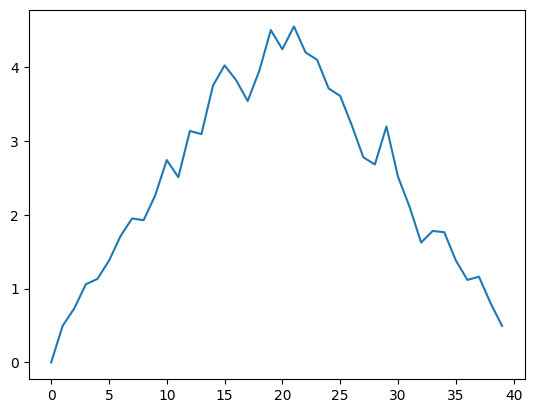

In [127]:
print ('desvio padrão')
pyplot.plot(data.std(axis=0))
pyplot.show()

### Resumindo

É muito comum criar um [alias](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.html#alias) (alias renomeação de bilioteca) para uma biblioteca ao importá-la
para reduzir a quantidade de digitação que temos que fazer.
Aqui estão os nossos três gráficos lado a lado usando aliases para `numpy` e` pyplot`:

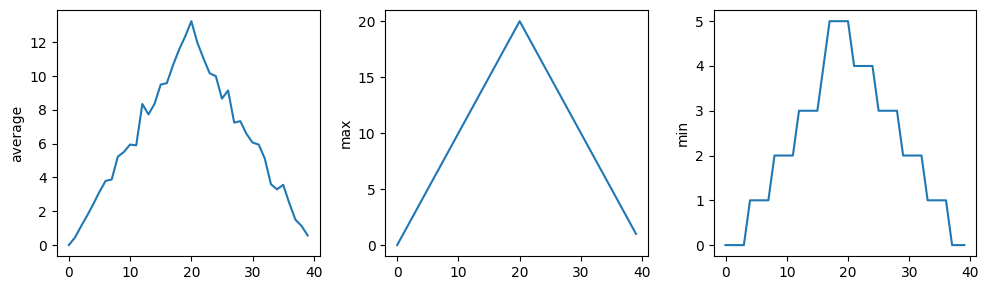

In [22]:
import numpy as np
from matplotlib import pyplot as plt

data = np.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

plt.figure(figsize=(10.0, 3.0))

plt.subplot(1, 3, 1)
plt.ylabel('average')
plt.plot(data.mean(0))

plt.subplot(1, 3, 2)
plt.ylabel('max')
plt.plot(data.max(0))

plt.subplot(1, 3, 3)
plt.ylabel('min')
plt.plot(data.min(0))

plt.tight_layout()
plt.show()

As duas primeiras linhas recarregam nossas bibliotecas como `np` e `plt`,
que são os alias que a maioria dos programadores de Python usam.
A chamada para `loadtxt` lê nossos dados,
 o resto do programa diz a biblioteca de plota os gráficos
o quão grande queremos que a figura seja,
que estamos criando três sub-gráficos,
o que desenhar para cada um,
e que queremos um layout menor.
(Perversamente,
se excluirmos essa chamada para `plt.tight_layout ()`,
os gráficos sairão realmente esticados e mais próxima.)

#### Exercício

1. Modifique o programa para exibir os três gráficos em cima um do outro em vez de lado a lado.

##### Resposta

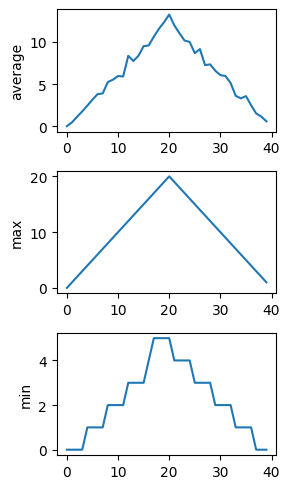

In [5]:
plt.figure(figsize=(3.0, 5.0))

plt.subplot(3, 1, 1)
plt.ylabel('average')
plt.plot(data.mean(0))

plt.subplot(3, 1, 2)
plt.ylabel('max')
plt.plot(data.max(0))

plt.subplot(3, 1, 3)
plt.ylabel('min')
plt.plot(data.min(0))

plt.tight_layout()
plt.show()

#### Exercício

Faça 4 gráficos contendo as seguintes informações:
 - Média da inflamação de todos os pacientes nos 10 primeiros dias;
 - Média da inflamação de todos os pacientes a cada 3 dias;
 - Média da inflamação dos 10 últimos pacientes nos 5 últimos dias;
 - Média de inflamação de cada paciente nos últimos 20 dias.

##### Resposta

In [6]:
import numpy as np
from matplotlib import pyplot as plt

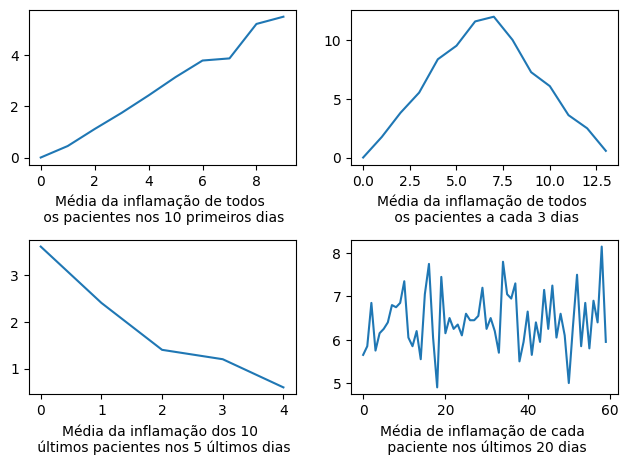

In [128]:
# plt.figure(figsize=(12.0, 8.0))

plt.subplot(2,2,1)
plt.xlabel("Média da inflamação de todos \n os pacientes nos 10 primeiros dias")
plt.plot(data[:,:10].mean(0))

plt.subplot(2,2,2)
plt.xlabel("Média da inflamação de todos \n os pacientes a cada 3 dias")
plt.plot(data[:, 0::3].mean(0))

plt.subplot(2,2,3)
plt.xlabel("Média da inflamação dos 10 \n últimos pacientes nos 5 últimos dias")
plt.plot(data[-10:,-5:].mean(0))

plt.subplot(2,2,4)
plt.xlabel("Média de inflamação de cada \n paciente nos últimos 20 dias")
plt.plot(data[:, -20:].mean(1))


plt.tight_layout()
plt.show()

#### Pontos Principais
* Importar uma biblioteca para um programa usando `import nome_da_biblioteca`.
* Usar a biblioteca `numpy` para trabalhar com arrays em Python.
* Usar `variável = valor` para atribuir um valor a uma variável e gravá-la na memória.
* As variáveis são criadas sob demanda sempre que um valor lhes é atribuído.
* Usar `print (alguma_coisa)` para exibir o valor de `alguma_coisa`.
* A expressão `array.shape` dá a forma de uma matriz.
* Usar `array [x, y]` para selecionar um único elemento de uma matriz.
* Os índices de matriz começam em 0, não 1.
* Usar `low: high` para especificar uma fatia que inclui os índices de `low` até `high-1`.
* Toda a indexação e corte que funciona em arrays também funciona em strings.
* Usar `# algum tipo de explicação` para adicionar comentários aos programas.
* Usar `array.mean ()`, `array.max ()` e `array.min ()` para calcular estatísticas simples.
* Usar `array.mean (axis = 0)` ou `array.mean (axis = 1)` para calcular estatísticas no eixo especificado.
* Usar a biblioteca `pyplot` de ` matplotlib` para criar visualizações simples.